<a href="https://colab.research.google.com/github/alvincharles45/alvincharles45.github.io/blob/main/notebooks/starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# STEP 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score
)
import matplotlib.pyplot as plt
import pickle

In [15]:
# STEP 2: Load dataset (semicolon-separated)
url_train = "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv"
data = pd.read_csv(url_train, sep=",")

# Clean column names (remove spaces and hidden characters)
data.columns = data.columns.str.strip()

print("✅ Data loaded successfully.")
print("Shape:", data.shape)
print("Columns:", data.columns.tolist())

✅ Data loaded successfully.
Shape: (37069, 20)
Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [16]:
# STEP 3: Encode categorical variables properly
label_enc = LabelEncoder()

# Encode all categorical columns EXCEPT the target 'y'
for col in data.select_dtypes(include=["object"]).columns:
    if col != "y":
        data[col] = label_enc.fit_transform(data[col])

# Convert target 'y' to binary (yes=1, no=0)
data["y"] = data["y"].map({"yes": 1, "no": 0})

# Separate features (X) and target (y)
X = data.drop("y", axis=1)
y = data["y"]

print("✅ Encoding complete.")
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

✅ Encoding complete.
Feature matrix shape: (37069, 19)
Target vector shape: (37069,)


In [17]:
# STEP 4: Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (29655, 19)
Testing size: (7414, 19)


In [18]:
# STEP 5: Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pickle

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=25,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=25, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [19]:
# STEP 6: Cross-validation (5-fold)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy")
print(f"✅ Cross-Validation Accuracy (mean of 5 folds): {cv_scores.mean():.4f}")

✅ Cross-Validation Accuracy (mean of 5 folds): 0.9005


In [20]:
# STEP 7: Evaluate model on test data
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print(f"✅ Test Accuracy: {acc:.4f}")
print(f"✅ ROC-AUC Score: {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Test Accuracy: 0.8987
✅ ROC-AUC Score: 0.8032

Confusion Matrix:
 [[6461  111]
 [ 640  202]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      6572
           1       0.65      0.24      0.35       842

    accuracy                           0.90      7414
   macro avg       0.78      0.61      0.65      7414
weighted avg       0.88      0.90      0.88      7414



In [21]:
# STEP 8: Save model
with open("bank_rf_model.pkl", "wb") as f:
    pickle.dump(rf, f, protocol=5)
print("✅ Model saved as bank_rf_model.pkl")

✅ Model saved as bank_rf_model.pkl


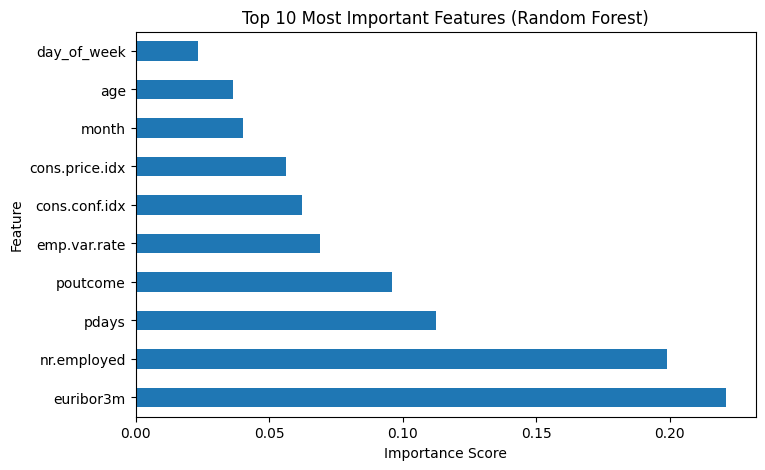

In [22]:
# STEP 9: Feature importance visualization
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind="barh", figsize=(8,5))
plt.title("Top 10 Most Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [24]:
# STEP 9: Generate predictions for the holdout (final marketing list)
url_holdout = "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv"
holdout = pd.read_csv(url_holdout, sep=",")

# Clean column names
holdout.columns = holdout.columns.str.strip()

# Encode categorical variables using same LabelEncoder logic
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

for col in holdout.select_dtypes(include=["object"]).columns:
    holdout[col] = label_enc.fit_transform(holdout[col])

# Generate predictions using your trained Random Forest model
preds = rf.predict(holdout)

# Export the predictions to CSV
output = pd.DataFrame({"predictions": preds})
output.to_csv("predictions.csv", index=False)

print(f"✅ predictions.csv created with {len(output)} rows.")
display(output.head())


✅ predictions.csv created with 4119 rows.


,predictions
0,0
1,0
2,1
3,0
4,0
